# English Language Learning Ability Prediction Model


## Summary


--TO BE ADDED the PROJECT SUMMARY INTRO PART


## Introduction


### Background


-- TO BE ADDED provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your report


### Research Question


Can we predict an individual's English proficiency score based on factors such as age, education, and language background?


### Dataset


The dataset is associated with the study "A Critical Period for Second Language Acquisition: Evidence from 2/3 Million English Speakers," authored by Joshua Hartshorne, Joshua Tenenbaum, and Steven Pinker.

This dataset is publicly available and consists of a substantial collection of data points, totaling 671.5MB in size. The repository includes several key components:

1. **Compiled.csv**: This file contains the raw data, including subjects and items that were later excluded from the analysis.
2. **Data.csv**: This file features only the subjects and items that were analyzed in the study.
3. **Processing.R**: An R script included in the repository is used for converting data from the compiled.csv file into the format present in the data.csv file.

The dataset covers a range of variables, such as:

- **Basic Information**: Unique subject ID, date and time at the start of the experiment, gender, and age.
- **Language Details**: Native languages (natlangs), primary language currently used (primelangs), and age at which English learning started (Eng_start).
- **Living and Education Background**: Years living in English-speaking countries, living with native English speakers, highest level of education, and countries lived in.
- **Psychiatric and Reading Difficulties**: Reports of any psychiatric disorders and difficulties with reading (dyslexia).
- **Experiment-specific Information**: Use of a dictionary in the experiment, prior participation in the experiment, and percentage of critical items answered correctly.

Additionally, there are columns for responses to individual questions in the experiment.


## Methods and Results


TO BE ADDED describe in written english the methods you used to perform your analysis from beginning to end that narrates the code the does the analysis.

Link to the dataset: [https://osf.io/pyb8s/wiki/home/]

Data Dictionary Summary Below for reference during EDA ** CAN BE DELETED LATER **

- **id:** Unique subject ID
- **date:** Date at the start of the experiment
- **time:** Time at the start of the experiment
- **gender:** Gender
- **age:** Age
- **natlangs:** List of subject's native languages
- **primelangs:** List of subject's primary language now
- **dyslexia:** Did the subject report difficulty with reading?
- **psychiatric:** Did the subject report any psychiatric disorders?
- **education:** Highest level of education
- **tests:** N/A
- **Eng_start:** Age at the start of English learning
- **Eng_country_yrs:** Number of years living in an English-speaking country
- **house_Eng:** Does the subject live with any native English speakers?
- **dictionary:** Did the subject report using a dictionary to complete the experiment?
- **already_participated:** Subject reported prior participation in the experiment
- **countries:** Countries lived in
- **currcountry:** Country currently lived in
- **US_region:** Regions of the USA lived in
- **UK_region:** Regions of the UK lived in
- **Can_region:** Regions of Canada lived in
- **Ebonics:** Speaker of Ebonics?
- **Ir_region:** County of Ireland lived in
- **UK_constituency:** Constituency of the UK lived in
- **nat_Eng:** Native speaker of English
- **prime_Eng:** Do not use
- **speaker_cat:** N/A
- **type:** N/A
- **lived_Eng_per:** Percentage of years speaking English that lived in an English-speaking country.
- **Eng_little:** Values are monoeng (native speaker of English only), bileng (native speaker of English + at least one other lang), lot (immersion learner), little (non-immersion learner).
- **correct:** Percentage of critical items correct
- **elogit:** Elogit of correct
- **natcon:** N/A
- **primeeng:** N/A
- **edtype:** N/An: N/A
  primeeng: N/A
  edtype: N/Aelogit elogit of correct

natcon N/A

primeeng N/A

edtype N/A


#### Loading Packages and Functions


In [24]:
import pandas as pd
import numpy as np
import altair as alt
import vegafusion
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
    FunctionTransformer,
)

#### Reading Data


In [25]:
# Reading the dataset

dataset = pd.read_csv(
    "../data/sampled_dataset.csv", sep=",", on_bad_lines="skip", low_memory=False
)
dataset.shape

(200849, 128)

#### Split the Dataset into Train/Test


Since we have already looked at the dataset from the source, we will be dropping some columns that increase the dimensionality of the dataset and are redundant Question level columns in the dataset that will not be used whatsoever in our dataset, we are choosing to drop those columns early on before we visualise our data and examine it for the modelling phase that will follow

Additionally since we are interested in how students perform, we do not need to consider at what time or date they took their tests hence we will drop the first 4 columns of the dataset.


In [26]:
# Creating a list of columns related to each question level data to drop
columns_to_drop = [col for col in dataset.columns if col.startswith("q")]

# Dropping the question columns from the DataFrame
dataset = dataset.drop(columns_to_drop, axis=1)

# Dropping the irrelevant columns from the DataFrame ( contain same values and do not relate to the question
dataset = dataset.drop("tests", axis=1)

# Dropping columns for ID, and index columns and additionally since we are interested in how
dataset = dataset.iloc[:, 4:]

In [27]:
# Splitting the DataFrame
train_df, test_df = train_test_split(dataset, test_size=0.3, random_state=123)

train_df.head()

,gender,age,natlangs,primelangs,dyslexia,psychiatric,education,Eng_start,Eng_country_yrs,house_Eng,...,Ir_region,UK_constituency,nat_Eng,prime_Eng,speaker_cat,type,Lived_Eng_per,Eng_little,correct,elogit
8931,male,20,Spanish,"English, Japanese, Spanish",0,0,Some Undergrad (higher ed),10,0.0,0.0,...,NaN,NaN,0,0,late,Spanish,0.0000,little,0.852632,1.726454
44135,male,21,English,English,0,0,Undergraduate Degree (3-5 years higher ed),0,NaN,NaN,...,NaN,NaN,1,1,native,United States,NaN,monoeng,0.968421,3.274446
192904,male,16,"English, Spanish","English, Spanish",0,0,Haven't Finished High School (less than 13 yea...,0,NaN,NaN,...,NaN,NaN,1,1,native,NaN,NaN,bileng,0.926316,2.468100
163907,female,19,Other,"English, Other",0,0,High School Degree (12-13 years),3,17.0,1.0,...,NaN,AL,0,0,foreign,NaN,1.0625,lot,0.968421,3.274446
147697,female,30,"English, Finnish","English, Finnish",0,0,Graduate Degree,0,NaN,NaN,...,NaN,NaN,1,1,native,NaN,NaN,bileng,0.926316,2.468100


#### EDA


Some Columns are redundant and binary versions of another column, we will exclude these from our dataset to start off, if needed we can switch to the binary version of the column later using our preprocessor


In [28]:
# Replacing NaN values for the numeric columns with zero
# df_numeric_filled = train_df.select_dtypes(include='number').fillna(0)
# train_df.update(df_numeric_filled)

In [29]:
# number of NaN values in each column
# nan_counts = train_df.isna().sum()
# print(nan_counts)

In [30]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140594 entries, 8931 to 15725
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   gender                140594 non-null  object 
 1   age                   140594 non-null  int64  
 2   natlangs              138890 non-null  object 
 3   primelangs            138935 non-null  object 
 4   dyslexia              140594 non-null  int64  
 5   psychiatric           140594 non-null  int64  
 6   education             140594 non-null  object 
 7   Eng_start             140594 non-null  int64  
 8   Eng_country_yrs       80280 non-null   float64
 9   house_Eng             80280 non-null   float64
 10  dictionary            140594 non-null  int64  
 11  already_participated  140594 non-null  int64  
 12  countries             134387 non-null  object 
 13  currcountry           133509 non-null  object 
 14  US_region             35609 non-null   object 
 15  UK_

In [31]:
train_df.describe(include="all")

,gender,age,natlangs,primelangs,dyslexia,psychiatric,education,Eng_start,Eng_country_yrs,house_Eng,...,Ir_region,UK_constituency,nat_Eng,prime_Eng,speaker_cat,type,Lived_Eng_per,Eng_little,correct,elogit
count,140594,140594.000000,138890,138935,140594.0,140594.000000,140594,140594.000000,80280.000000,80280.000000,...,2456,19251,140594.000000,140594.000000,140594,83527,77901.000000,117214,140594.000000,140594.000000
unique,3,NaN,2399,2266,NaN,NaN,44,NaN,NaN,NaN,...,129,2250,NaN,NaN,3,54,NaN,4,NaN,NaN
top,female,NaN,English,English,NaN,NaN,Graduate Degree,NaN,NaN,NaN,...,none,none,NaN,NaN,native,United States,NaN,little,NaN,NaN
freq,75023,NaN,51933,64309,NaN,NaN,49463,NaN,NaN,NaN,...,1008,7347,NaN,NaN,62351,18216,NaN,56360,NaN,NaN
mean,NaN,29.973911,NaN,NaN,0.0,0.029873,NaN,5.211318,4.441143,0.195553,...,NaN,NaN,0.432273,0.430502,NaN,NaN,0.147289,NaN,0.937534,3.022610
std,NaN,11.253002,NaN,NaN,0.0,0.170238,NaN,5.710675,10.190303,0.396628,...,NaN,NaN,0.495394,0.495148,NaN,NaN,0.301487,NaN,0.061040,1.007372
min,NaN,7.000000,NaN,NaN,0.0,0.000000,NaN,0.000000,0.000000,0.000000,...,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,NaN,0.063158,-2.622436
25%,NaN,22.000000,NaN,NaN,0.0,0.000000,NaN,0.000000,0.000000,0.000000,...,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,NaN,0.915789,2.331573
50%,NaN,27.000000,NaN,NaN,0.0,0.000000,NaN,5.000000,0.000000,0.000000,...,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,NaN,0.957895,3.012262
75%,NaN,35.000000,NaN,NaN,0.0,0.000000,NaN,10.000000,2.000000,0.000000,...,NaN,NaN,1.000000,1.000000,NaN,NaN,0.095238,NaN,0.978947,3.621671


#### Numeric Looking Columns Distribution


['age', 'dyslexia', 'psychiatric', 'Eng_start', 'Eng_country_yrs', 'house_Eng', 'dictionary', 'already_participated', 'nat_Eng', 'prime_Eng', 'Lived_Eng_per', 'correct', 'elogit']


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'dyslexia'}>,
        <Axes: title={'center': 'psychiatric'}>,
        <Axes: title={'center': 'Eng_start'}>],
       [<Axes: title={'center': 'Eng_country_yrs'}>,
        <Axes: title={'center': 'house_Eng'}>,
        <Axes: title={'center': 'dictionary'}>,
        <Axes: title={'center': 'already_participated'}>],
       [<Axes: title={'center': 'nat_Eng'}>,
        <Axes: title={'center': 'prime_Eng'}>,
        <Axes: title={'center': 'Lived_Eng_per'}>,
        <Axes: title={'center': 'correct'}>],
       [<Axes: title={'center': 'elogit'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

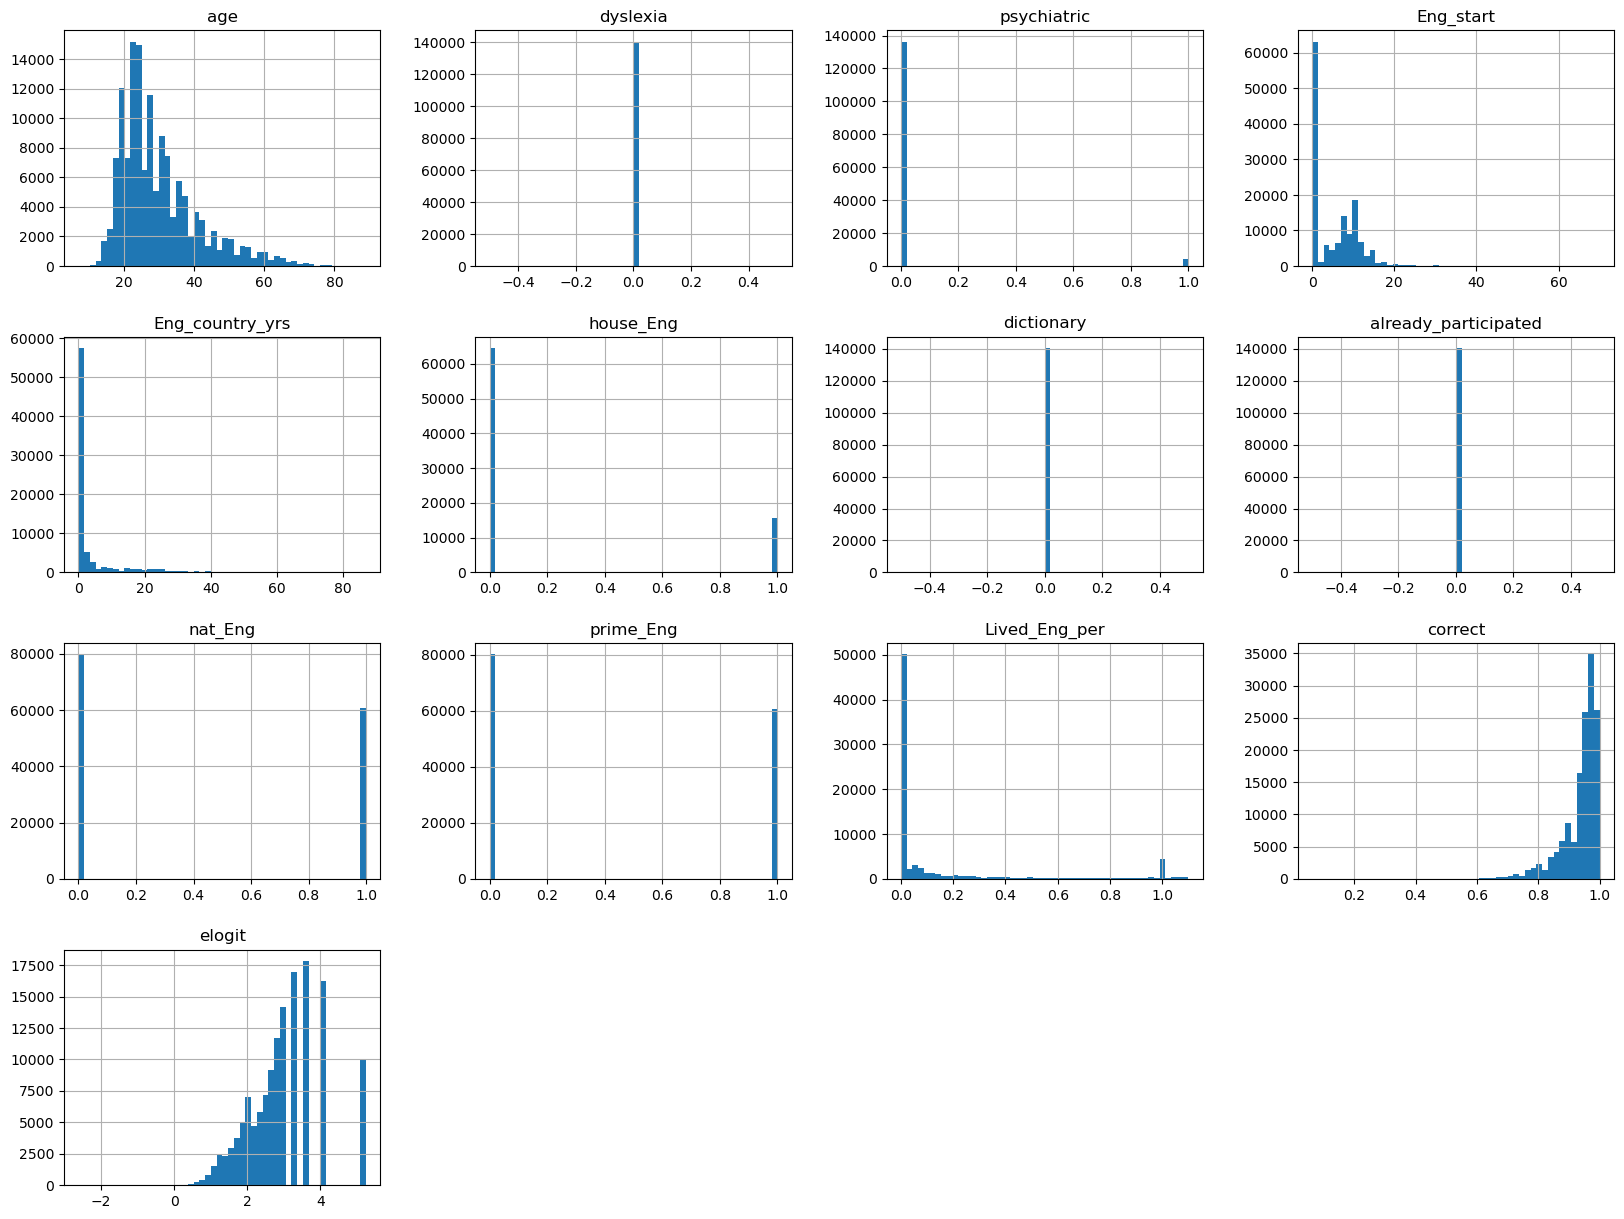

In [32]:
alt.data_transformers.enable("vegafusion")

numeric_cols = train_df.select_dtypes(include="number").columns.tolist()
print(numeric_cols)
train_df.hist(bins=50, figsize=(20, 15))

#### Correlation matrix


In [33]:
correlation_matrix = train_df.corr(numeric_only=True).style.background_gradient(
    cmap="seismic"
)
correlation_matrix

/Users/farrandi/miniconda3/envs/522/lib/python3.11/site-packages/pandas/io/formats/style.py:3819: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/Users/farrandi/miniconda3/envs/522/lib/python3.11/site-packages/pandas/io/formats/style.py:3820: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,age,dyslexia,psychiatric,Eng_start,Eng_country_yrs,house_Eng,dictionary,already_participated,nat_Eng,prime_Eng,Lived_Eng_per,correct,elogit
age,1.000000,nan,-0.034795,0.025381,0.301947,0.102547,nan,nan,0.063439,0.062124,0.115234,0.102708,0.106708
dyslexia,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
psychiatric,-0.034795,nan,1.000000,0.005652,-0.010398,0.002922,nan,nan,0.002231,0.001932,-0.003752,-0.108256,-0.088107
Eng_start,0.025381,nan,0.005652,1.000000,-0.379884,-0.287491,nan,nan,-0.740839,-0.737942,-0.337734,-0.440083,-0.437537
Eng_country_yrs,0.301947,nan,-0.010398,-0.379884,1.000000,0.569955,nan,nan,0.163828,0.163828,0.866494,0.220153,0.259877
house_Eng,0.102547,nan,0.002922,-0.287491,0.569955,1.000000,nan,nan,0.118084,0.118084,0.597927,0.175287,0.208547
dictionary,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
already_participated,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
nat_Eng,0.063439,nan,0.002231,-0.740839,0.163828,0.118084,nan,nan,1.000000,0.996396,0.138761,0.360891,0.392636
prime_Eng,0.062124,nan,0.001932,-0.737942,0.163828,0.118084,nan,nan,0.996396,1.000000,0.138761,0.359188,0.390815


Types of Columns


In [34]:
numeric_feats = ["age", "Eng_start", "Eng_country_yrs", "Lived_Eng_per"]

binary_feats = ["house_Eng", "nat_Eng", "prime_Eng", "psychiatric"]
target = ["correct"]

Columns that can safely be dropped after looking at the distributions and looking at the data dictionary:

- `Elogit`: is the exponential log of the correct column, which would be useful for predicting probability since we would like to predict the score itself whihc is a continuous variable we can omit this from our analysis.
- `Dyslexia`: shows that all participants were not dyslexic hence there will not be any features that the model can learn so will be omitted since all values are 0
- `Dictionary`: since none of the participants used one we can safely omit this from our dataset.
- `Natlangs`: The native langs columns has a corresponding binary column which is called nat_Eng, which is a yes no column instead of the specific languages the native speakers speak. So for milestone 1 analysis we chose to omit this and go with the simple binary feature since we are interested in the English speaking ability and whether a participant had prior experience/nativity.
- `Primelangs`:same as natlangs column, we will opt for the binary column representation in the dataset.
- `Already_participated`: all values are 0 hence can be safely dropped and this feature is not of interest.
- `gender`: in order to avoid gender bias
- `type`: It is the original country where the person is from, this information is indirectly captured in the native or primary column and since we care whether the participant is from mainly English speaking vs Non English speaking we will exclude specific countries by type but keep the country column.
- We will remove the region specific information to limit the research in terms of caring whether the participant spent years in an english speaking country regardless of which country it was( dropping these columns) hence we will not consider whether a person lived in ireland or UK as long as it is english speaking so we will use columns like Eng_years as opposed to UK_region or US_region.
- `currcountry`: This column mentions the current country the participant lives in, to limit the study and reduce dimensionality we will exclude this column. Since we have other features that capture the time spent by a participant in English Speaking countries which we are more interested in. For example a native speaker who currently lives in South Africa still speaks english very well and we capture those details about them by Eng_years as opposed to where the person currently lives.


In [35]:
drop_feats = [
    "elogit",
    "dyslexia",
    "dictionary",
    "already_participated",
    "natlangs",
    "primelangs",
    "Can_region",
    "Ir_region",
    "US_region",
    "UK_region",
    "UK_constituency",
    "gender",
    "type",
    "currcountry",
    "countries",
]

In [36]:
other_cols = list(
    set(train_df.columns.tolist())
    - set(numeric_feats)
    - set(binary_feats)
    - set(target)
    - set(drop_feats)
)
train_df[other_cols].describe()

,education,Eng_little,Ebonics,speaker_cat
count,140594,117214,35591,140594
unique,44,4,3,3
top,Graduate Degree,little,0,native
freq,49463,56360,34526,62351


In [37]:
drop_feats

['elogit',
 'dyslexia',
 'dictionary',
 'already_participated',
 'natlangs',
 'primelangs',
 'Can_region',
 'Ir_region',
 'US_region',
 'UK_region',
 'UK_constituency',
 'gender',
 'type',
 'currcountry',
 'countries']

In [38]:
binary_withNA = ["Ebonics"]
# The rest of the coluns are categorical
categorical_feats = list(
    set(train_df.columns.tolist())
    - set(numeric_feats)
    - set(binary_feats)
    - set(target)
    - set(drop_feats)
    - set(binary_withNA)
)
train_df[categorical_feats].head()

,education,Eng_little,speaker_cat
8931,Some Undergrad (higher ed),little,late
44135,Undergraduate Degree (3-5 years higher ed),monoeng,native
192904,Haven't Finished High School (less than 13 yea...,bileng,native
163907,High School Degree (12-13 years),lot,foreign
147697,Graduate Degree,bileng,native


In [39]:
train_df["Ebonics"].value_counts()

Ebonics
0        34526
1         1062
Array        3
Name: count, dtype: int64

#### Visualising Categorical Variables


In [40]:
chart = (
    alt.Chart(train_df)
    .mark_bar()
    .encode(
        x=alt.X("education:N", title="Education Level"),
        y=alt.Y("count():Q", title="Count"),
        tooltip=["count()"],
    )
    .properties(title="Distribution of Education Levels")
)

chart

alt.Chart(...)

In [41]:
# Get value counts for the 'education' column
education_counts = train_df["education"].value_counts()

# Filter to include only counts greater than 1
education_counts_greater_than_one = education_counts[education_counts > 100]

# Display the filtered value counts
print(education_counts_greater_than_one)

education
Graduate Degree                                         49463
Undergraduate Degree (3-5 years higher ed)              36608
Some Undergrad (higher ed)                              19577
High School Degree (12-13 years)                        16672
Some Graduate School                                    11422
Haven't Finished High School (less than 13 years ed)     5152
Didn't Finish High School (less than 13 years ed)        1634
Name: count, dtype: int64


Since majority of the Education levels are the 7 large categories, all additional Education Levels in the other categories which have a value of 1 will be labelled as Others to avoid adding major dimensionality to our dataset and we are interested in the major groups of Education Levels.


In [42]:
categorical_education = ["education"]
categorical_feats = ["Eng_little", "speaker_cat"]

In [43]:
alt.Chart(train_df).mark_bar().encode(
    x=alt.X(alt.repeat()),
    y="count()",
).properties(
    height=200, width=800
).repeat(categorical_feats, columns=1)

alt.RepeatChart(...)

#### Preprocessing


#### Creating the Column Transformers


In [44]:
len(train_df.columns)

28

| Column Types            | Column Names                                                                                                                                                                                  | Preprocessing Step                                     |
| ----------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------ |
| Numeric                 | 'age', 'Eng_start', 'Eng_country_yrs', 'Lived_Eng_per'                                                                                                                                        | Standard Scaler and Fill Missing values with Median    |
| Binary                  | 'house_Eng', 'nat_Eng', 'prime_Eng', 'psychiatric'                                                                                                                                            | Keep as is                                             |
| Target                  | 'correct'                                                                                                                                                                                     | Target Column to be kept as is for now                 |
| Drop                    | 'elogit', 'dyslexia', 'dictionary', 'already_participated', 'natlangs', 'primelangs', 'Can_region', 'Ir_region', 'US_region', 'UK_region', 'UK_constituency', 'gender', 'type', 'currcountry' | Drop Columns                                           |
| Binary with NA          | 'Ebonics'                                                                                                                                                                                     | Fill Missing values with 0                             |
| Categorical - Education | 'education' (7 major categories and Others)                                                                                                                                                   | Categories other than the main 7 to be moved to Others |
| Categorical             | 'Eng_little', 'speaker_cat', 'countries'                                                                                                                                                      | One hot encoding the Categorical column                |
| Categorical - Countries | 'countries' (Map to continent)                                                                                                                                                                | Map the countries to their continents                  |


For the current scope of this analysis, we are not including "Ebonics". This is because it is an "object" datatype. We will add it in our future analysis.


In [45]:
numeric_feats = ["age", "Eng_start", "Eng_country_yrs", "Lived_Eng_per"]

binary_feats = ["psychiatric"]
target = ["correct"]

drop_feats = [
    "elogit",
    "dyslexia",
    "dictionary",
    "already_participated",
    "natlangs",
    "primelangs",
    "Can_region",
    "Ir_region",
    "US_region",
    "UK_region",
    "UK_constituency",
    "gender",
    "type",
    "currcountry",
    "countries",
]
binary_withNA = [
    "house_Eng",
    "nat_Eng",
    "prime_Eng",
]  # ["Ebonics", "house_Eng", "nat_Eng", "prime_Eng"]

categorical_education = ["education"]  # show 7 major categories and Others
categorical_feats = ["Eng_little", "speaker_cat"]
# categorical_countries = ['countries']

In [46]:
numeric_transformer = make_pipeline(
    SimpleImputer(strategy="median"), StandardScaler())

categorical_transformer = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="little"),
    OneHotEncoder(handle_unknown="ignore", sparse=False),
)

binary_NA_transformer = make_pipeline(
    SimpleImputer(strategy="constant", fill_value=0),
    OneHotEncoder(handle_unknown="ignore", sparse=False,
                  drop="if_binary", dtype=int),
)


categories_list = education_counts_greater_than_one.index.tolist()


# Define the custom function to map values to 'Other'
def map_to_other(df):
    return (
        df["education"].apply(
            lambda x: x if x in categories_list else "Others")
    ).to_frame()


# Defines the order for Education to be used in the OrdinalEncoder
education_order = [
    "Graduate Degree",
    "Some Graduate School",
    "Undergraduate Degree (3-5 years higher ed)",
    "Some Undergrad (higher ed)",
    "High School Degree (12-13 years)",
    "Haven't Finished High School (less than 13 years ed)",
    "Didn't Finish High School (less than 13 years ed)",
    "Others",
]


# Create a transformer using FunctionTransformer
categorical_education_tranformer = make_pipeline(
    FunctionTransformer(map_to_other), OrdinalEncoder(
        categories=[education_order])
)


preprocessor = make_column_transformer(
    ("drop", drop_feats),
    (numeric_transformer, numeric_feats),
    (categorical_transformer, categorical_feats),
    ("passthrough", binary_feats),
    # ("passthrough", target),# for now it is pass through but later most likely log transformation will be applied hence added like this
    (binary_NA_transformer, binary_withNA),
    (categorical_education_tranformer, categorical_education),
)

In [47]:
map_to_other(train_df[categorical_education])

,education
8931,Some Undergrad (higher ed)
44135,Undergraduate Degree (3-5 years higher ed)
192904,Haven't Finished High School (less than 13 yea...
163907,High School Degree (12-13 years)
147697,Graduate Degree
...,...
119906,Undergraduate Degree (3-5 years higher ed)
192476,Graduate Degree
17730,Undergraduate Degree (3-5 years higher ed)
28030,Some Graduate School


In [48]:
X_train = train_df.drop(columns=target)
y_train = train_df["correct"]

X_test = test_df.drop(columns=target)
y_test = test_df["correct"]

In [49]:
check = (
    drop_feats
    + target
    + numeric_feats
    + binary_feats
    + drop_feats
    + binary_withNA
    + categorical_education
    + categorical_feats
)

In [50]:
preprocessor.fit(X_train)  # Calling fit to examine all the transformers.
preprocessor.named_transformers_

/Users/farrandi/miniconda3/envs/522/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/farrandi/miniconda3/envs/522/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


{'drop': 'drop',
 'pipeline-1': Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                 ('standardscaler', StandardScaler())]),
 'pipeline-2': Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='little', strategy='constant')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse=False,
                                sparse_output=False))]),
 'passthrough': 'passthrough',
 'pipeline-3': Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value=0, strategy='constant')),
                 ('onehotencoder',
                  OneHotEncoder(drop='if_binary', dtype=<class 'int'>,
                                handle_unknown='ignore', sparse=False,
                                sparse_output=False))]),
 'pipeline-4': Pipeline(steps=[('functiontransformer',
                  FunctionTransformer(func=<function map_to_other at 0x2875f98a0>)),
                 ('ordinalencod

In [51]:
ohe_columns = list(
    preprocessor.named_transformers_["pipeline-2"]
    .named_steps["onehotencoder"]
    .get_feature_names_out(categorical_feats)
)

new_columns = (
    numeric_feats + ohe_columns + binary_feats +
    binary_withNA + categorical_education
)

In [52]:
X_train_enc = pd.DataFrame(
    preprocessor.transform(X_train), index=X_train.index, columns=new_columns
)
X_train_enc.head(5)

,age,Eng_start,Eng_country_yrs,Lived_Eng_per,Eng_little_bileng,Eng_little_little,Eng_little_lot,Eng_little_monoeng,speaker_cat_foreign,speaker_cat_late,speaker_cat_native,psychiatric,house_Eng,nat_Eng,prime_Eng,education
8931,-0.886337,0.838552,-0.316680,-0.345725,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0
44135,-0.797471,-0.912560,-0.316680,-0.345725,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,2.0
192904,-1.241798,-0.912560,-0.316680,-0.345725,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0
163907,-0.975202,-0.387227,1.806243,4.155322,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0
147697,0.002318,-0.912560,-0.316680,-0.345725,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [53]:
X_train_enc.isnull().values.any()

False

In [54]:
X_train_enc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140594 entries, 8931 to 15725
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  140594 non-null  float64
 1   Eng_start            140594 non-null  float64
 2   Eng_country_yrs      140594 non-null  float64
 3   Lived_Eng_per        140594 non-null  float64
 4   Eng_little_bileng    140594 non-null  float64
 5   Eng_little_little    140594 non-null  float64
 6   Eng_little_lot       140594 non-null  float64
 7   Eng_little_monoeng   140594 non-null  float64
 8   speaker_cat_foreign  140594 non-null  float64
 9   speaker_cat_late     140594 non-null  float64
 10  speaker_cat_native   140594 non-null  float64
 11  psychiatric          140594 non-null  float64
 12  house_Eng            140594 non-null  float64
 13  nat_Eng              140594 non-null  float64
 14  prime_Eng            140594 non-null  float64
 15  education           

In [55]:
from sklearn.linear_model import Ridge, RidgeCV

# Set alphas to search over
alphas = 10.0 ** np.arange(-6, 6, 1)

# Make the pipeline
ridge_pipe = make_pipeline(preprocessor, RidgeCV(alphas=alphas, cv=10))
ridge_pipe.fit(X_train, y_train)

/Users/farrandi/miniconda3/envs/522/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/farrandi/miniconda3/envs/522/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('drop', 'drop',
                                                  ['elogit', 'dyslexia',
                                                   'dictionary',
                                                   'already_participated',
                                                   'natlangs', 'primelangs',
                                                   'Can_region', 'Ir_region',
                                                   'US_region', 'UK_region',
                                                   'UK_constituency', 'gender',
                                                   'type', 'currcountry',
                                                   'countries']),
                                                 ('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='med...
                                                                                               'Some '
                                                                                               'Undergrad '
                                                                                               '(higher '
                                                                                               'ed)',
                                                                                               'High '
                                                                                               'School '
                                                                                               'Degree '
                                                                                               '(12-13 '
                                                                                               'years)',
                                                                                               "Haven't "
                                                                                               'Finished '
                                                                                               'High '
                                                                                               'School '
                                                                                               '(less '
                                                                                               'than '
                                                                                               '13 '
                                                                                               'years '
                                                                                               'ed)',
                                                                                               "Didn't "
                                                                                               'Finish '
                                                                                               'High '
                                                                                               'School '
                                                                                               '(less '
                                                                                               'than '
                                                                                               '13 '
                                                                                               'years '
                                                                                               'ed)',
                                                                                               'Others']]))]),
                                                  ['education'])]

--- TO CONTINUE FOLLOW 573 LECTURE TEST THE X_TRAIN FIT THE TRANSFORMATIONS AS WE WOULD EXPECT


#### Ridge Regression Model

In this section we will be using the Ridge Regression model to predict the English Proficiency Score of a participant based on the features we have selected in the previous section.
